# Graph class

In [1]:
# This code block is necessary when running in `ggsolver:v0.1` docker image.
import sys
sys.path.append('/home/ggsolver/')

In [2]:
from ggsolver.graph import Graph, NodePropertyMap, EdgePropertyMap
from pprint import pprint
print("import ok.")

import ok.


In [3]:
# Creating a graph
g = Graph()
print(g)

<Graph with |V|=0, |E|=0>


In [4]:
# Add single node
n0 = g.add_node()
print(f"g.add_node() -> {n0}")

# Add multiple nodes
n1, n2 = g.add_nodes(num_nodes=2)
print(f"g.add_nodes(num_nodes=2) -> n1:{n1}, n2:{n2}")

nodes = g.add_nodes(num_nodes=5)
print(f"g.add_nodes(num_nodes=5) -> nodes:{nodes}")

g.add_node() -> 0
g.add_nodes(num_nodes=2) -> n1:1, n2:2
g.add_nodes(num_nodes=5) -> nodes:[3, 4, 5, 6, 7]


In [5]:
# Create an edge (returns a key corresponding to edge).
key0 = g.add_edge(n0, n1)
print(f"g.add_edge(n0, n1) -> key0:{key0}")

key1 = g.add_edge(n0, n1)
print(f"When two edges are added between same nodes, the key is incremented.")
print(f"Every edge is represented by a unique triple: (uid, vid, key).")
print(f"g.add_edge(n0, n1) -> key1:{key1}")

key2 = g.add_edge(n0, n2)
print(f"g.add_edge(n0, n2) -> key2:{key2}")

# Add multiple edges
keys = g.add_edges([(n0, n1), (n1, n2)])
print(f"g.add_edges([(n0, n1), (n1, n2)]) -> keys:{keys}")

g.add_edge(n0, n1) -> key0:0
When two edges are added between same nodes, the key is incremented.
Every edge is represented by a unique triple: (uid, vid, key).
g.add_edge(n0, n1) -> key1:1
g.add_edge(n0, n2) -> key2:0
g.add_edges([(n0, n1), (n1, n2)]) -> keys:[2, 0]


In [6]:
# Check successors of a node
successors = g.successors(n0)
print(f"g.successors(n0) -> {list(successors)}  ... Node IDs of successors.")

# Check predecessors of a node
predecessors = g.predecessors(n1)
print(f"g.predecessors(n1) -> {list(predecessors)}  ... Node IDs of predecessors.")

g.successors(n0) -> [1, 2]  ... Node IDs of successors.
g.predecessors(n1) -> [0]  ... Node IDs of predecessors.


In [7]:
# Check out_edges from a node
out_edges = g.out_edges(n0)
print(f"g.out_edges(n0) -> {list(out_edges)}  ... Edge triples of out edges.")

# Check in_edges to a node
in_edges = g.in_edges(n1)
print(f"g.in_edges(n1) -> {list(in_edges)}  ... Edge triples of out edges.")

g.out_edges(n0) -> [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0)]  ... Edge triples of out edges.
g.in_edges(n1) -> [(0, 1, 0), (0, 1, 1), (0, 1, 2)]  ... Edge triples of out edges.


In [8]:
# Check all nodes
nodes = g.nodes()
print(f"g.nodes() -> {list(nodes)}  ... Node IDs.")

# Check all edges
edges = g.edges()
print(f"g.edges() -> {list(edges)}  ... Edge triples of out edges.")

# Get number of nodes, edges
print(f"g.number_of_nodes() -> {g.number_of_nodes()}")
print(f"g.number_of_edges() -> {g.number_of_edges()}")

g.nodes() -> [0, 1, 2, 3, 4, 5, 6, 7]  ... Node IDs.
g.edges() -> [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (1, 2, 0)]  ... Edge triples of out edges.
g.number_of_nodes() -> 8
g.number_of_edges() -> 5


In [9]:
# Associate a property with nodes
# Approach 1: Create the property separately and then associate it with graph.
name = NodePropertyMap(g)
name[n0] = "n0"
g["name"] = name
print(f"g['name'][n0] -> {g['name'][n0]}  ... If property value is assigned, then the value is returned.")
print(f"g['name'][n1] -> {g['name'][n1]}  ... If property value is NOT assigned, then default value is returned.")

# Approach 2: Create the property directly.
g["name"] = NodePropertyMap(g, default="default-name")
g["name"][n0] = "n0"
print(f"g['name'][n0] -> {g['name'][n0]}  ... If property value is assigned, then the value is returned.")
print(f"g['name'][n1] -> {g['name'][n1]}  ... If property value is NOT assigned, then default value is returned.")

g['name'][n0] -> n0  ... If property value is assigned, then the value is returned.
g['name'][n1] -> None  ... If property value is NOT assigned, then default value is returned.
g['name'][n0] -> n0  ... If property value is assigned, then the value is returned.
g['name'][n1] -> default-name  ... If property value is NOT assigned, then default value is returned.


In [10]:
# Associate a property with edges (edge properties can also be associated in two ways like node properties).
g["label"] = EdgePropertyMap(g)
g["label"][(n0, n1, key0)] = "(n0, n1, 0)"
print(f"g['label'][(n0, n1, key0)] -> {g['label'][(n0, n1, key0)]}  "
      f"... If property value is assigned, then the value is returned.")
print(f"g['label'][(n0, n1, key1)] -> {g['label'][(n0, n1, key1)]}  "
      f"... If property value is NOT assigned, then default value is returned.")

g['label'][(n0, n1, key0)] -> (n0, n1, 0)  ... If property value is assigned, then the value is returned.
g['label'][(n0, n1, key1)] -> None  ... If property value is NOT assigned, then default value is returned.


In [11]:
# Graph properties are assigned similarly, except we do not have GraphPropertyMap class.
g["graph_prop0"] = 10
g["graph_prop1"] = "I am a graph property!"

print(f'g["graph_prop0"] -> {g["graph_prop0"]}')
print(f'g["graph_prop1"] -> {g["graph_prop1"]}')

g["graph_prop0"] -> 10
g["graph_prop1"] -> I am a graph property!


In [12]:
# A graph object can be serialized into a dictionary.
g_dict = g.serialize()
pprint(g_dict)

{'graph': {'edge_properties': {'label': {'default': None,
                                         'dict': [{'edge': (0, 1, 0),
                                                   'pvalue': '(n0, n1, 0)'}]}},
           'edges': {0: {1: 3, 2: 1}, 1: {2: 1}},
           'graph_properties': {'graph_prop0': 10,
                                'graph_prop1': 'I am a graph property!'},
           'node_properties': {'name': {'default': 'default-name',
                                        'dict': {0: 'n0'}}},
           'nodes': 8}}


In [13]:
# A dictionary can be deserialized to get a graph object.
new_g = Graph.deserialize(g_dict)
pprint(new_g.serialize())

{'graph': {'edge_properties': {'label': {'default': None,
                                         'dict': [{'edge': (0, 1, 0),
                                                   'pvalue': '(n0, n1, 0)'}]}},
           'edges': {0: {1: 3, 2: 1}, 1: {2: 1}},
           'graph_properties': {'graph_prop0': 10,
                                'graph_prop1': 'I am a graph property!'},
           'node_properties': {'name': {'default': 'default-name',
                                        'dict': {0: 'n0'}}},
           'nodes': 8}}


In [14]:
# A graph can be saved and loaded to/from a file
#   fpath: gives a complete path of the file to which the graph will be saved. (include extension)
#   overwrite: if the file should overwrite an existing file.
#   protocol: either json or pickle.
g.save(fpath="mygraph.graph", overwrite=True, protocol="json")
loaded_g = Graph.load(fpath="mygraph.graph", protocol="json")

In [15]:
# Draw graph. Saves to the given location as PNG image. 
loaded_g.to_png("graph1.png")


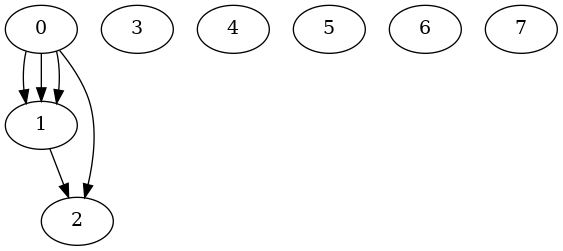

In [16]:
# Jupyter notebook setup to export images in HTML. 
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Image
from IPython.core.display import HTML

image = PILImage.open("graph1.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

In [17]:
# If nlabel, elabel is specified, the corresponding node and edge properties are used to label 
#   the nodes and edges of the generated graph.
# Note: If the mapping from nodes to selected node-properties is not 1-1, then the generated graph can be different
#   from the true graph. For example, note the difference between the `graph1.png` and `graph2.png`.
loaded_g.to_png("graph2.png", nlabel=["name"], elabel=["label"])


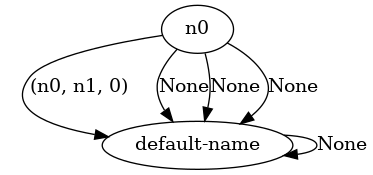

In [18]:
# Jupyter notebook setup to export images in HTML. 
image = PILImage.open("graph2.png")
output = io.BytesIO()
image.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

We can now check if two `Graphs` are isomorphic to each other.

In [22]:
g1 = Graph()
g1.add_nodes(num_nodes=4)
g1.add_edges([(0, 1), (1, 2), (2, 3)])

g2 = Graph()
g2.add_nodes(num_nodes=4)
g2.add_edges([(1, 0), (2, 1), (3, 2)])

g1.is_isomorphic_to(g2)

True